In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from beam_moments import *
from transform_beam import *

In [2]:
df_tracker = get_df_tracker()
df_tracker.head()

,radial,vertical,counts,Station
index,,,,
2,-59.0,-59.0,0.0,station12
3,-59.0,-57.0,0.0,station12
4,-59.0,-55.0,0.0,station12
5,-59.0,-53.0,0.0,station12
6,-59.0,-51.0,0.0,station12


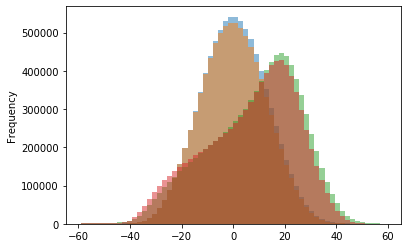

In [3]:
mask1 = df_tracker["Station"] == 'station12'
mask2 = df_tracker["Station"] == 'station18'
(df_tracker[mask2])["vertical"].plot(kind="hist",weights=(df_tracker[mask2])['counts'],bins=60,alpha=0.5)
(df_tracker[mask1])["vertical"].plot(kind="hist",weights=(df_tracker[mask1])['counts'],bins=60,alpha=0.5)
(df_tracker[mask2])["radial"].plot(kind="hist",weights=(df_tracker[mask2])['counts'],bins=60,alpha=0.5)
(df_tracker[mask1])["radial"].plot(kind="hist",weights=(df_tracker[mask1])['counts'],bins=60,alpha=0.5)

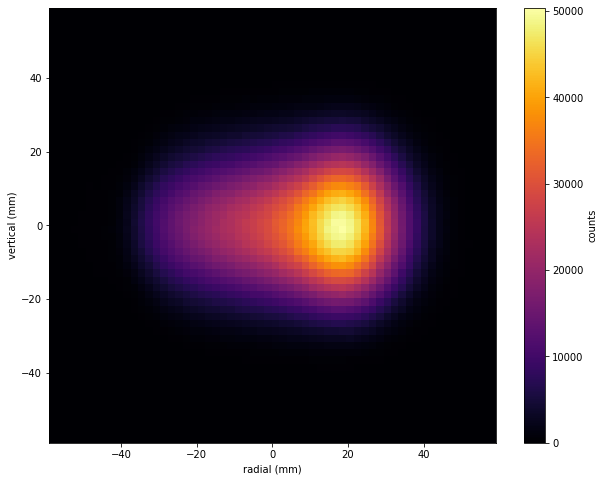

In [4]:
plot_beam(df_tracker)

In [5]:
w = df_tracker['counts']
v = df_tracker['vertical']
r = df_tracker['radial']
m_2 = get_mean(r,w) #the radial mean
m_3 = get_mean(v,w) #the vertical mean
em_2 = get_rms(r,m_2,w) #the radial rms
em_3 = get_rms(v,m_3,w) #the vertical rms

## To correct and account for various beam dynamical effects, we need to transform the tracker data.

In [6]:
xshift = -20
yshift = -20
df_shift = shift_beam(df_tracker,xshift,yshift)

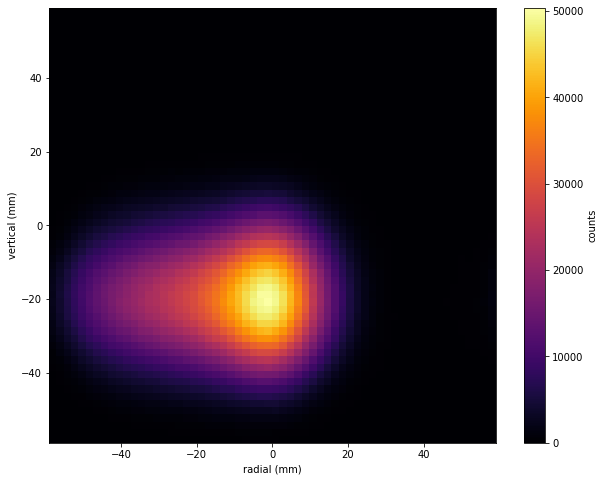

In [7]:
plot_beam(df_shift)

## Similarly, we may want to add random noise

In [8]:
from transform_beam import add_baseline_noise

In [9]:
df_noise = add_baseline_noise(df_tracker,1000)

/Users/bono/Desktop/gm2FieldAnalysis/MuonConvolution/tracker_info/transform_beam.py:107: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['counts'][df['counts'] < 0] = 0


In [10]:
def my_add_baseline_noise(df_input,noise_level):

    #copy the dataframe
    df = df_input.copy()
    
    #convert the rel noise level to an abs one
    noise_level = int(noise_level*(df['counts'].mean()))
    
    #add random noise to the counts
    df['noise'] = 1
    df['noise'] = np.random.randint(-noise_level, noise_level+1, df.shape[0])
    df['counts'] = df['counts'] + df['noise']
    
    #set any negative numbers to zero
    df['counts'][df['counts'] < 0] = 0
    
    return df

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


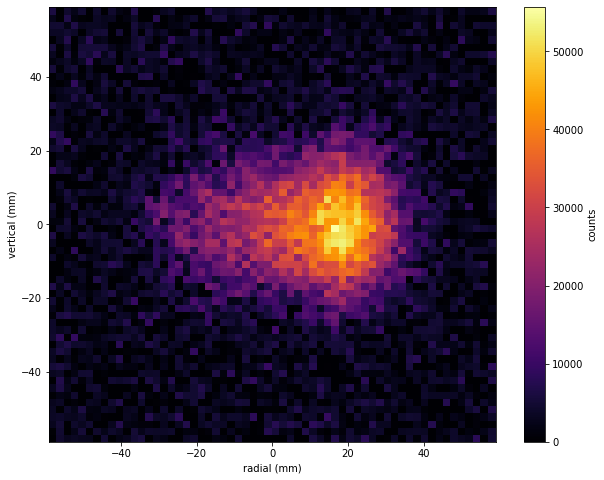

In [11]:
df_noise = my_add_baseline_noise(df_tracker,2)
plot_beam(df_noise)
# df_noise.head()

## Similarly, we may want to broaden the distributions

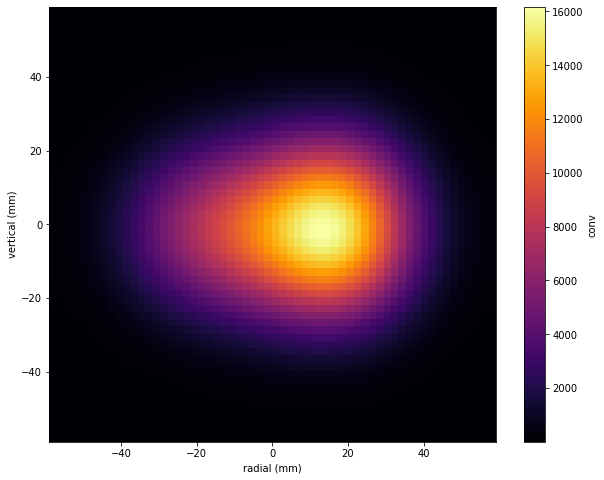

In [38]:

mask = df_tracker['Station'] == 'station12'
df_conv = df_tracker[mask].copy()

c = convolve_df(df_conv,59,10)
df_conv['conv'] = c
plot_beam(df_conv,var='conv')

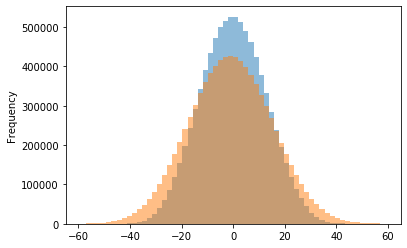

In [40]:
df_conv["vertical"].plot(kind="hist",weights=df_conv['counts'],bins=60,alpha=0.5)
df_conv["vertical"].plot(kind="hist",weights=df_conv['conv'],bins=60,alpha=0.5)

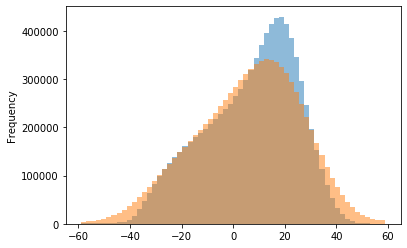

In [41]:
df_conv["radial"].plot(kind="hist",weights=df_conv['counts'],bins=60,alpha=0.5)
df_conv["radial"].plot(kind="hist",weights=df_conv['conv'],bins=60,alpha=0.5)

In [37]:
kernel = gaussian_kernel(59,10)


In [ ]:
# t = df_tracker[['radial','vertical','counts']].to_numpy
df_temp = df_tracker.copy()
df_temp = df_temp[df_temp['Station'] == 'station12']
df_temp = df_temp.set_index(['radial', 'vertical'])
a = df_temp['counts'].to_numpy()

In [ ]:
a = np.reshape(a, (60, 60))
p = plt.imshow(a)
plt.colorbar(p)
plt.show()

In [ ]:
c = ndi.convolve(a,kernel)

In [ ]:
p = plt.imshow(c)
plt.colorbar(p)
plt.show()

In [ ]:
c = np.reshape(c, (60*60, -1))
df_temp['conv'] = c

In [ ]:
# plot_beam(df_temp)
df_temp = df_temp.reset_index()


In [ ]:
df_temp['counts'] = df_temp['conv']
plot_beam(df_temp)

In [ ]:
plot_beam(df_tracker[df_tracker['Station']=='station12'])